In [10]:
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn
from astropy.convolution import Moffat2DKernel
from scipy.signal import convolve as scipy_convolve
plt.style.use(astropy_mpl_style)

In [11]:
hdul = fits.open('image.fit')
hdul.info()

img = fits.getdata('image.fit')
bias = fits.getdata('bias.fit')
dark = fits.getdata('dark.fit')
flat = fits.getdata('flat.fit')

Filename: image.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      32   (6248, 4176)   int16 (rescales to uint16)   


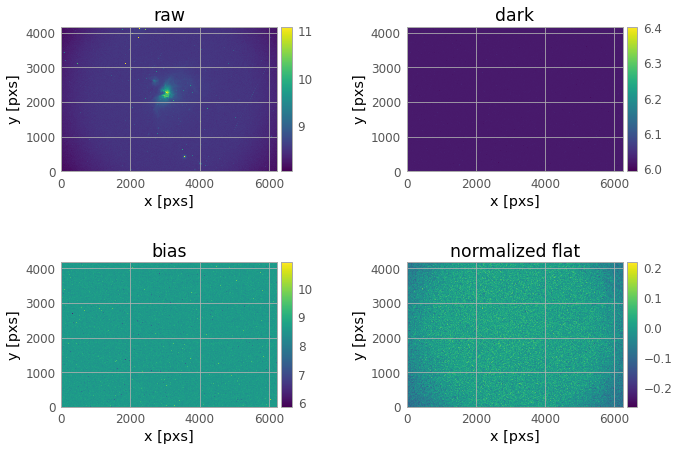

In [34]:
fig, axs = plt.subplots(2, 2)

im = axs[0,0].imshow(np.log(img), interpolation='none', origin='lower', cmap='viridis')
axs[0,0].set_title('raw')
axs[0,0].set_xlabel('x [pxs]')
axs[0,0].set_ylabel('y [pxs]')
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[0,1].imshow(np.log(dark), interpolation='none', origin='lower', cmap='viridis')
axs[0,1].set_title('dark')
axs[0,1].set_xlabel('x [pxs]')
axs[0,1].set_ylabel('y [pxs]')
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1,0].imshow(np.log(bias), interpolation='none', origin='lower', cmap='viridis')
axs[1,0].set_title('bias')
axs[1,0].set_xlabel('x [pxs]')
axs[1,0].set_ylabel('y [pxs]')
divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1,1].imshow(np.log(flat/np.mean(flat)), interpolation='none', origin='lower', cmap='viridis')
axs[1,1].set_title('normalized flat')
axs[1,1].set_xlabel('x [pxs]')
axs[1,1].set_ylabel('y [pxs]')
divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

plt.subplots_adjust(left=0.,
                    bottom=0., 
                    right=1, 
                    top=1, 
                    wspace=0.5, 
                    hspace=0.2)
plt.show()

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(img.flatten(), bins=256)
darks = [d for d in dark.flatten() if d < 1000]
axs[0,1].hist(darks, bins=256)
axs[0,1].set_xlim(400, 600)
axs[1,0].hist(bias.flatten(), bins=256)
axs[1,1].hist((flat/np.mean(flat)).flatten(), bins=256)
plt.show()

In [ ]:
from fonctions import *
image_clean = calibrate(img, bias, dark, flat)
plt.figure()
plt.imshow(np.log(image_clean), interpolation='none', origin='lower', cmap='viridis')
plt.colorbar()
plt.show()

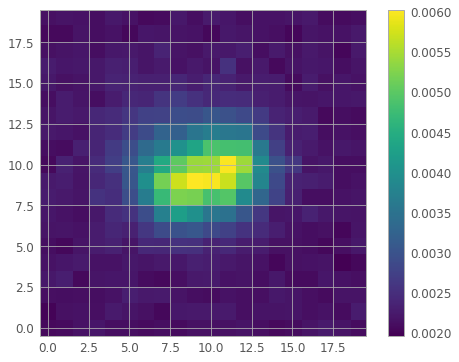

In [31]:
PSF = image_clean[2926-10: 2926+10, 2029-10:2029+10]
PSF = PSF / np.sum(PSF)
plt.figure()
plt.imshow(PSF, interpolation='none', origin='lower', cmap='viridis')
plt.colorbar()
plt.show()

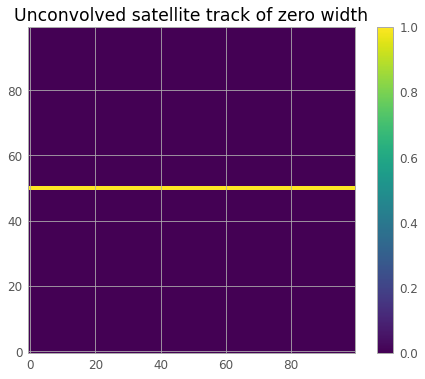

In [32]:
#Now we create a model of the *unconvolved* satellite track (an empty array with ones where the satellite is)
track = np.zeros((100, 100))

#just have it horizontal for now around the middle, but later you can adapt this to be at an angle; also look into convolving on an oversampled grid to avoid problems
track[50, :] = 1
plt.imshow(track, origin='lower', cmap='viridis')
plt.title('Unconvolved satellite track of zero width')
plt.colorbar()
plt.show()

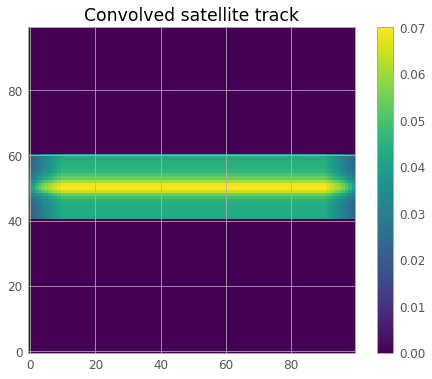

In [33]:
track_conv = scipy_convolve(track, PSF, mode='same', method='direct')

plt.imshow(track_conv, origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Convolved satellite track')
plt.show()